# IMPORTS

In [996]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# Q1a. HISTORICAL DATA
The asset under review is Solana Crypto coin (SOL-USD) with data showing a one-year period

In [997]:
data = yf.download("SOL-USD", start="2021-03-11", end="2022-03-11")#Download data from yahoo finance for Solana Coin

[*********************100%***********************]  1 of 1 completed


#### First 10 trading days

In [998]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-11,14.219837,16.239399,13.704226,15.992279,15.992279,229272516
2021-03-12,16.020920,16.485796,14.111229,14.552142,14.552142,185287457
2021-03-13,14.563803,15.394398,13.920056,15.308803,15.308803,145102757
2021-03-14,15.301581,15.349832,14.378764,14.508266,14.508266,90232804
2021-03-15,14.477127,14.790473,13.698057,14.186662,14.186662,102600692
2021-03-16,14.163912,14.282896,13.229815,13.622773,13.622773,112303590
2021-03-17,13.634964,14.266797,13.130529,14.220203,14.220203,94696339
2021-03-18,14.210677,14.745477,13.827284,14.230025,14.230025,79074263
2021-03-19,14.232650,14.488219,13.932458,14.204796,14.204796,68715211


#### Last 10 trading days

In [999]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-02,98.649071,105.984772,97.105797,100.649635,100.649635,3800592927
2022-03-03,100.653770,101.427269,94.377960,95.539200,95.539200,2309311748
2022-03-04,95.567039,95.708130,87.554443,88.245979,88.245979,2592829728
2022-03-05,88.290535,91.036179,86.288841,89.647842,89.647842,1437161887
2022-03-06,89.648590,89.865379,84.329643,84.542183,84.542183,1467561782
2022-03-07,84.552872,86.483086,80.316849,82.130066,82.130066,2375648176
2022-03-08,82.112602,84.779900,81.540115,82.254761,82.254761,2112765959
2022-03-09,82.279922,89.482048,82.206238,88.202065,88.202065,2624860794
2022-03-10,88.190399,88.453949,81.019341,82.939087,82.939087,2196400279


#### Data Descriptives

In [1000]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,99.646734,104.620447,94.546838,99.756077,99.756077,1.965543e+09
std,69.936103,72.417030,66.770431,69.712752,69.712752,1.898403e+09
min,13.019528,13.705250,12.370458,13.025085,13.025085,6.422934e+07
25%,34.201124,35.986107,32.335175,34.279504,34.279504,5.086359e+08
50%,89.588840,93.342476,85.346714,89.640167,89.640167,1.684556e+09
75%,159.699932,168.491280,150.922901,159.075340,159.075340,2.712710e+09
max,258.781555,260.062103,246.122421,258.934326,258.934326,1.706864e+10


### Spot Price for Asset

In [1001]:
S = data['Adj Close'][-1]#Spot price as at last day of trading for year under review
print('The spot price for SOL-USD is', round(S,2))

The spot price for SOL-USD is 80.74


### Date of minimum closing price

In [1002]:
data[data["Adj Close"] == data["Adj Close"].min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-25,13.650586,13.70525,12.614725,13.025085,13.025085,116277943


### Date of maximum closing price

In [1003]:
data[data["Adj Close"] == data["Adj Close"].max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-06,236.492752,260.062103,235.289963,258.934326,258.934326,3869779683


In [1004]:
data['Adj Close'].head()

Date
2021-03-11    15.992279
2021-03-12    14.552142
2021-03-13    15.308803
2021-03-14    14.508266
2021-03-15    14.186662
Name: Adj Close, dtype: float64

## Q1b. Solana price movement over one-year period

Text(0.5, 1.0, 'Solana Price Movement for One-year')

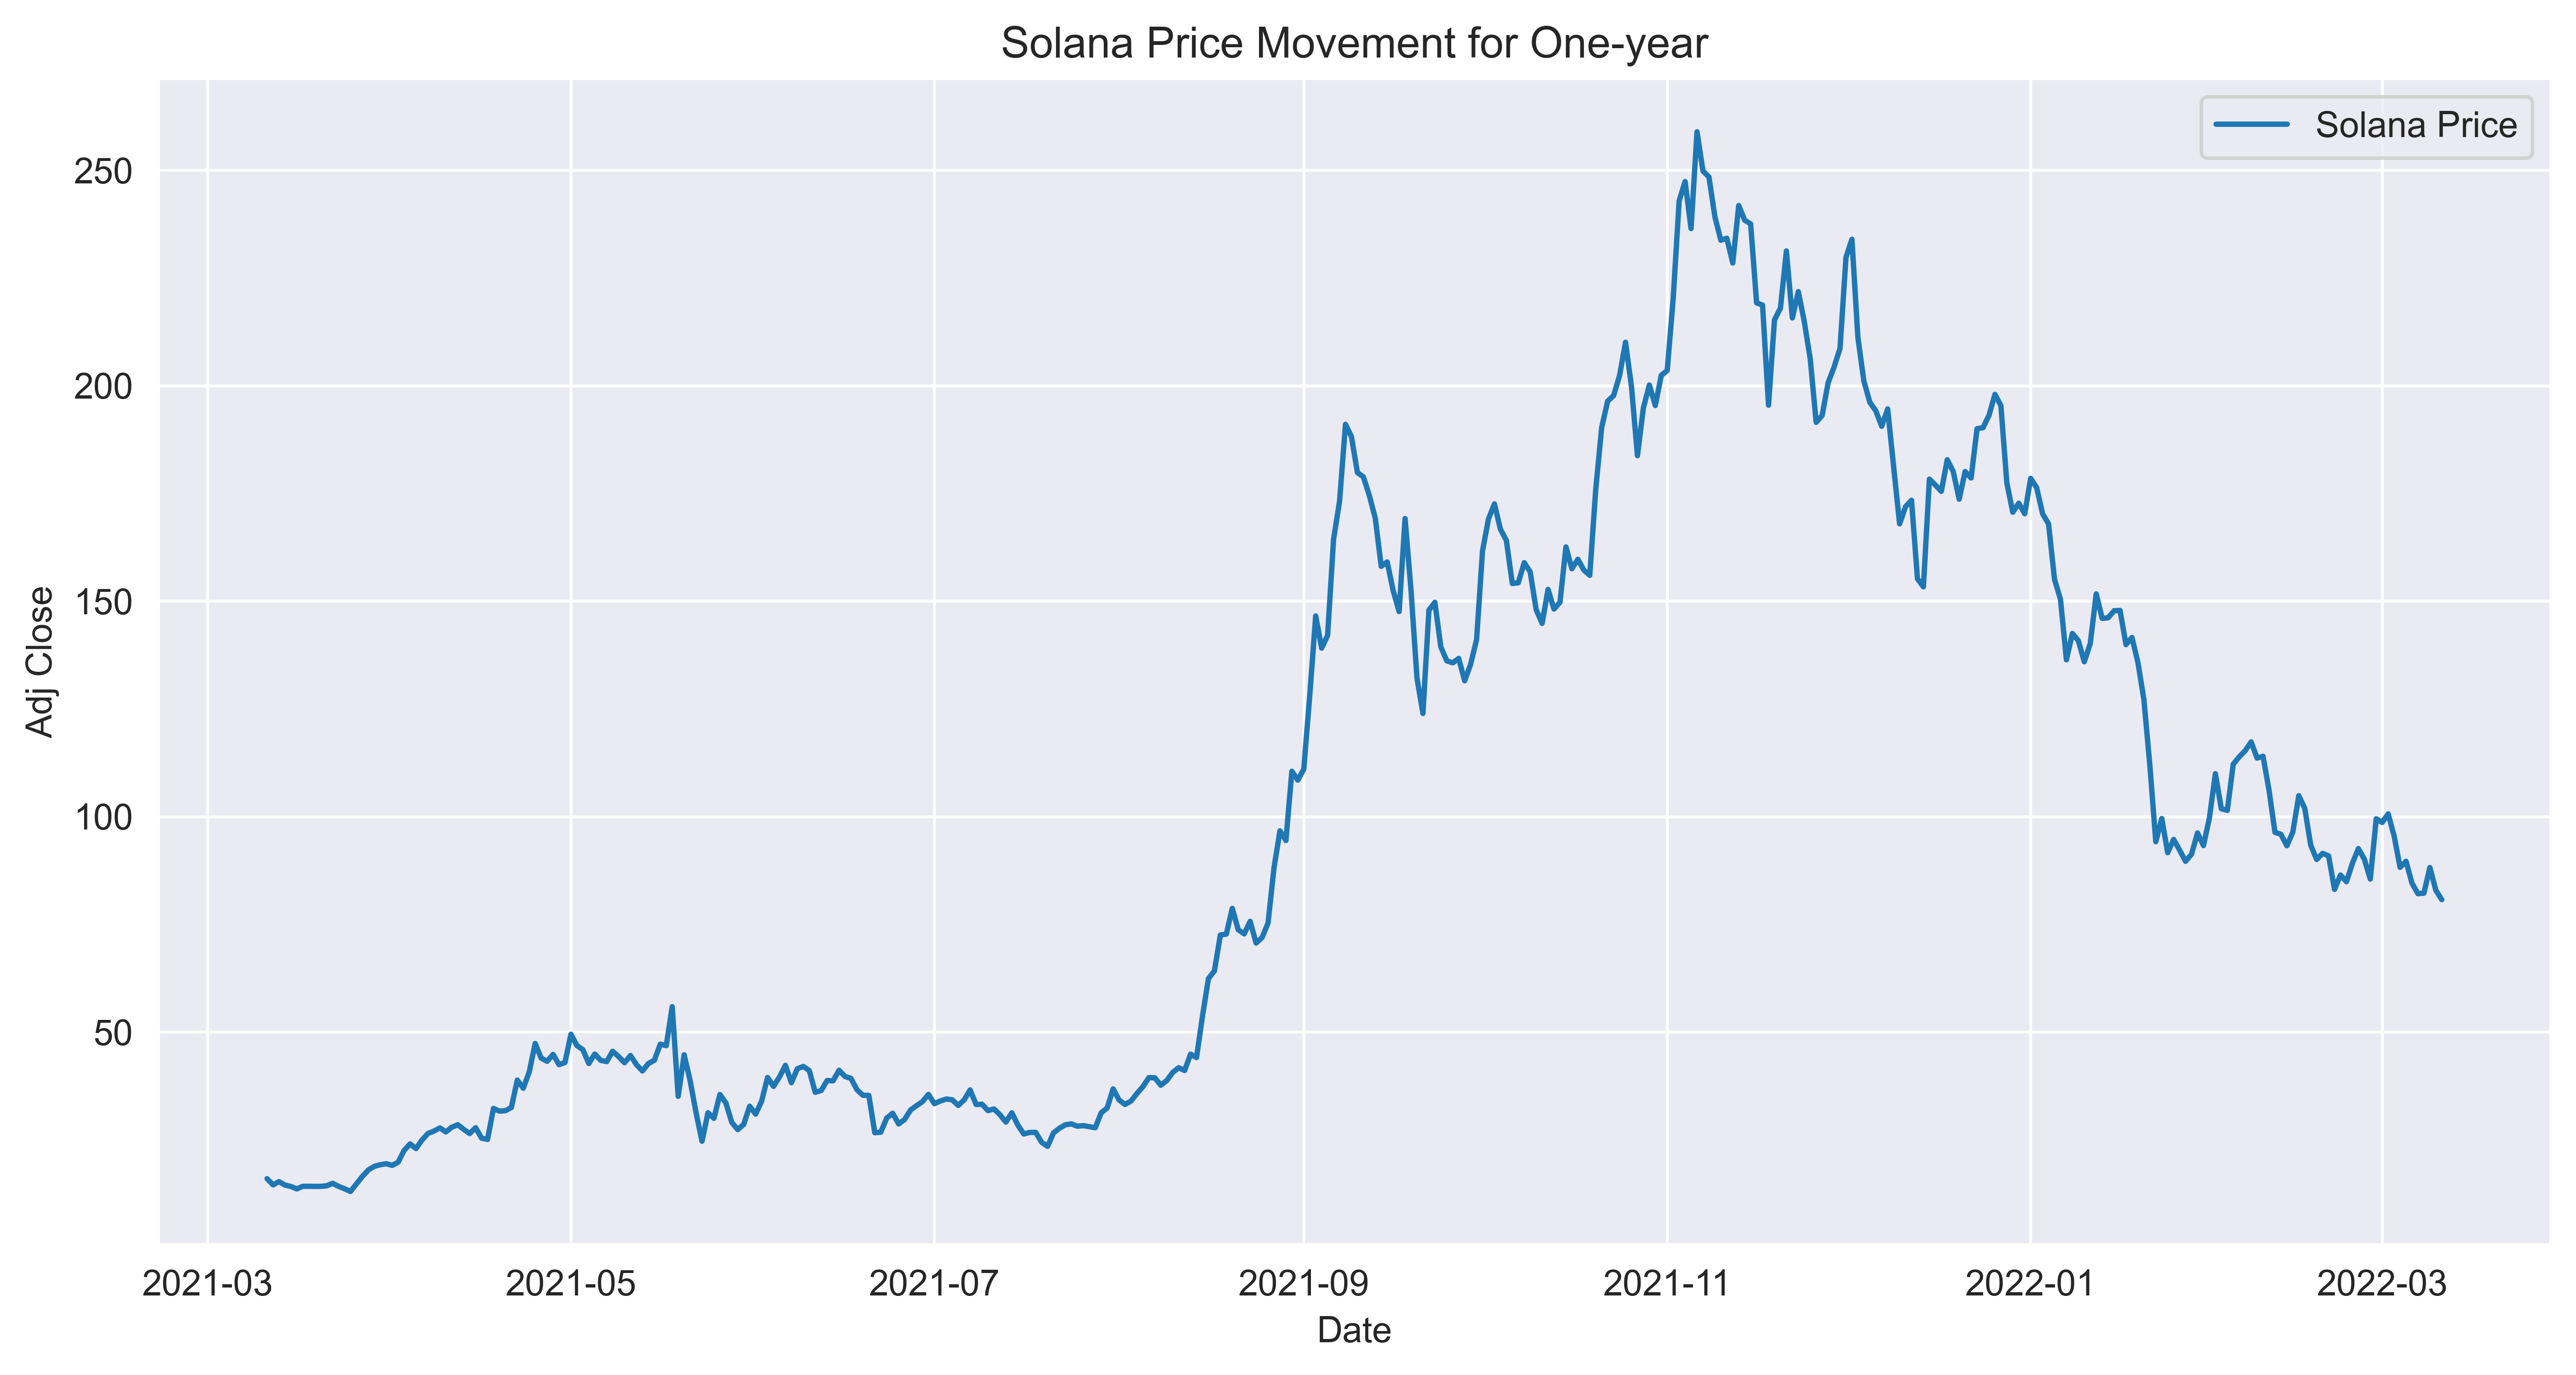

In [1005]:
plt.figure(figsize=[12, 6], facecolor="w", dpi=550)
sns.set_style(style="darkgrid")
sns.lineplot(data.index, data["Adj Close"])
#sns.lineplot(data.index, data["Adj Close"].rolling(window=20).mean())
plt.legend(["Solana Price","Moving Average"])
plt.title("Solana Price Movement for One-year")

#### Monthly moving Average for Solana

Text(0.5, 1.0, 'Solana Price with monthly moving average')

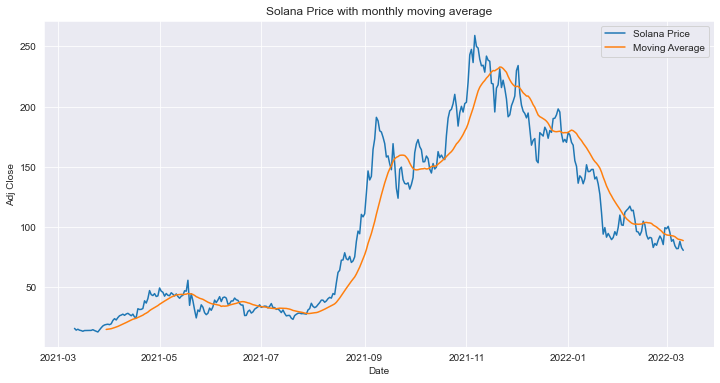

In [1006]:
plt.figure(figsize=[12, 6], facecolor="w")
sns.set_style(style="darkgrid")
sns.lineplot(data.index, data["Adj Close"])
sns.lineplot(data.index, data["Adj Close"].rolling(window=20).mean())
plt.legend(["Solana Price","Moving Average"])
plt.title("Solana Price with monthly moving average")

#### Normal retun for Solana 

In [1007]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.09005201227017279,
 0.0519965001700305,
 -0.05229253889890779,
 -0.02216699905738637,
 -0.039747796974588176]

Text(0.5, 1.0, 'Solana Price Returns')

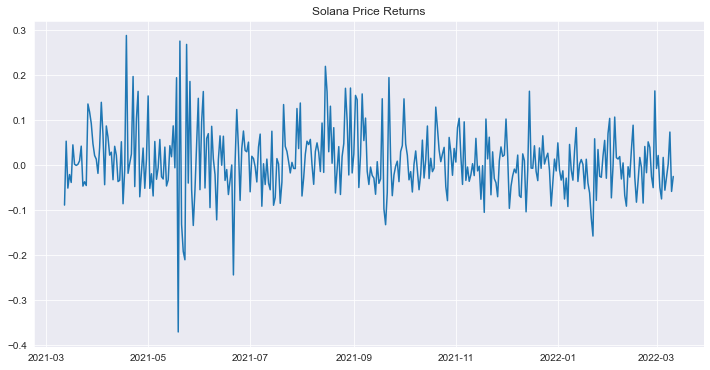

In [1008]:
plt.figure(figsize=(12,6))
plt.plot(returns)
plt.title("Solana Price Returns")

#### Returns for Solana shows a normal distribution

<AxesSubplot:title={'center':'Distribution of Return for Solana'}, xlabel='Adj Close', ylabel='Density'>

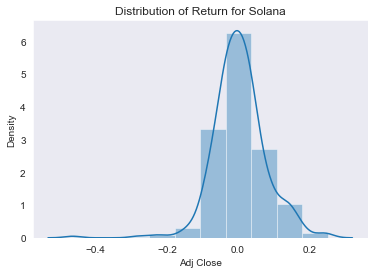

In [1009]:
plt.title("Distribution of Return for Solana")
plt.grid()
sns.distplot(data['Adj Close'].pct_change().apply(lambda x: np.log(x+1)), bins=10,)

#### Log Returns for Solana

In [1010]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.09436783744557643,
 0.05068978747541236,
 -0.05370940968576811,
 -0.022416379210130243,
 -0.04055931753807059]

## Q1c. Annualized Volatility

In [1011]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized log return is 2.63884277 and its annulized volatility is 1.42868488


### Annualized volatility for the first 6 months

In [1012]:
first_six_vol = round(data['Adj Close'][:183].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(366), 4)
first_six_vol

1.6918

### Annualized volatility for the last 6 months

In [1013]:
last_six_vol = round(data['Adj Close'][183:].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(366), 4)
last_six_vol

1.0928

# Q2. DERIVATIVE FOR SOLANA
## Binary Pricing Models
### CRR Bionomial Tree

In [1014]:
S0 = 80.74              # spot asset price 
K = 105.0               # strike
T = 1/52                 # maturity 
r = 0.0114                 # risk free rate 
sig = 1.43               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff 

In [1015]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u        

In [1016]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [1017]:
S

array([[ 80.74      ,  90.53402486, 101.51609683, 113.83032988],
       [  0.        ,  72.00549859,  80.74      ,  90.53402486],
       [  0.        ,   0.        ,  64.21590076,  72.00549859],
       [  0.        ,   0.        ,   0.        ,  57.26898628]])

In [1018]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4717267701334716

In [1019]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 14.46597514],
       [ 0.        ,  0.        ,  0.        , 32.99450141],
       [ 0.        ,  0.        ,  0.        , 47.73101372]])

In [1020]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[25.16371343, 16.41532221,  7.64142898,  0.        ],
       [ 0.        , 32.97915637, 24.2523272 , 14.46597514],
       [ 0.        ,  0.        , 40.77642644, 32.99450141],
       [ 0.        ,  0.        ,  0.        , 47.73101372]])

In [1021]:
print('European ' + payoff, str( V[0,0]))

European put 25.16371342813388


### Monte Carlo Simulation

In [1022]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [1023]:
T = 1/52 #option time period
r = 0.0114 #Risk free rate
sigma = 1.43 #Volatility rate
S0 = 80.74 #Spot price
K = 105.0 #Strike price

In [1024]:
S = mcs_simulation_np(5000)

In [1025]:
S = np.transpose(S)
S

array([[ 80.74      ,  80.46670509,  80.44449722, ..., 102.98021369,
        103.22767643, 103.18255112],
       [ 80.74      ,  80.82950903,  80.69051932, ...,  58.41713619,
         58.30081536,  58.1924949 ],
       [ 80.74      ,  80.53809752,  80.42890355, ...,  96.34836443,
         96.09538784,  96.37857076],
       ...,
       [ 80.74      ,  81.10584946,  80.97627401, ...,  75.27987009,
         75.15230049,  75.38712893],
       [ 80.74      ,  81.0227704 ,  80.56379259, ...,  71.52234812,
         71.21619293,  71.16569418],
       [ 80.74      ,  80.56952814,  80.5444299 , ...,  87.35660142,
         87.6533981 ,  87.56728781]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

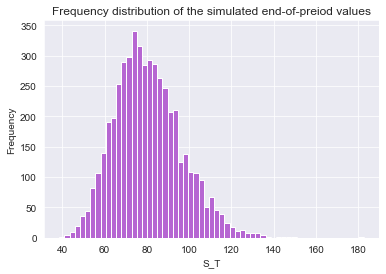

In [1026]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#b666d2',alpha=1, rwidth=2.5)

plt.grid(axis='y', alpha=0.95)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [1027]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 25.059604491040737


### Black Scholes Model
#### European Option for non-dividend paying coin

In [1028]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [1029]:
euro_option_bs(80.74, 105, 1/52, 0.0114, 1.43, 'put')
print('European BSM put', str(p))

European BSM put 25.059604491040737


# GREEKS

# Delta
Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [1030]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [1031]:
S = np.linspace(10, 300, 50)
T = np.linspace(0.5, 2, 50)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 105, T[i], 0.0114, 0, 1.43, 'call')

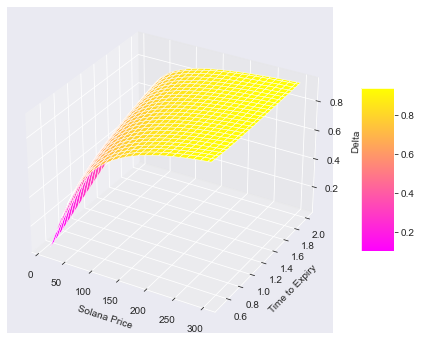

In [1032]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.spring, linewidth=0.5, antialiased=True)
ax.set_xlabel('Solana Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [1033]:
d = delta(80.74, 105, 1/52, 0.0114, 0, 1.43, 'put')#Delta for one-week option
print('The value of Delta is', d.round(4),'.','If Solana price increase 1 dollar, then the value of the option will decrease $', d.round(4), '.')

The value of Delta is -0.8896 . If Solana price increase 1 dollar, then the value of the option will decrease $ -0.8896 .


# Gamma
Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [1034]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [1035]:
gamma(80.74, 105, 1/52, 0.0114, 0, 1.43, 'put')#Gamma for one-week option
print('The Gamma for the put option is', d.round(4),'.','If Solana price increase by 1 dollar, then the value of the delta will decrease $', d.round(4), '.')

The Gamma for the put option is -0.8896 . If Solana price increase by 1 dollar, then the value of the delta will decrease $ -0.8896 .


In [1036]:
S = np.linspace(10, 300, 50)
T = np.linspace(0.5, 2, 50)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 105, T[i], 0.0114, 0, 1.43, 'call')

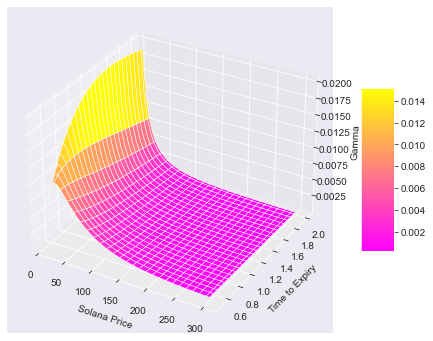

In [1037]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.spring, linewidth=0.5, antialiased=True)
ax.set_xlabel('Solana Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Speed
Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [1038]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [1039]:
speed(80.74, 105, 1/52, 0.0114, 0, 1.43, 'put')

0.00010463826884048397

In [1040]:
S = np.linspace(10, 300, 50)
T = np.linspace(0.5, 2, 50)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 105, T[i], 0.0114, 0, 1.43, 'put')

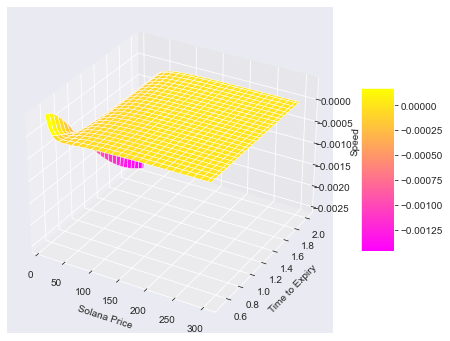

In [1041]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.spring, linewidth=0.5, antialiased=True)
ax.set_xlabel('Solana Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta
Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [1042]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [1043]:
theta(80.74, 105, 1/52, 0.0114, 0, 1.43, 'put')

79.56682801484507

In [1044]:
S = np.linspace(10, 300, 50)
T = np.linspace(0.5, 2, 50)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 105, T[i], 0.0114, 0, 1.43, 'call')

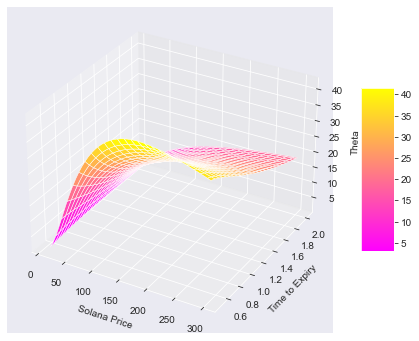

In [1045]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.spring, linewidth=0.5, antialiased=True)
ax.set_xlabel('Solana Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Rho
Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [1046]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho


In [1047]:
rho(80.74, 105, 1/52, 0.0114, 0, 1.43, 'put')

-1.8625703943006633

In [1048]:
S = np.linspace(10, 300, 50)
T = np.linspace(0.5, 2, 50)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 105, T[i], 0.0114, 0, 1.43, 'put')

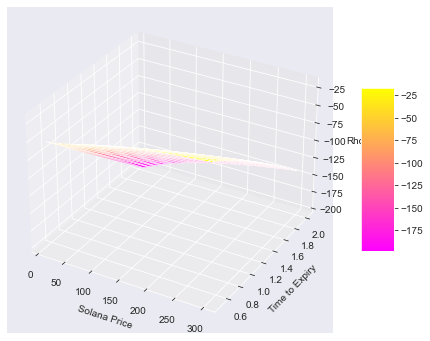

In [1049]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.spring, linewidth=0.5, antialiased=True)
ax.set_xlabel('Solana Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Vega
Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [1050]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [1051]:
S = np.linspace(10, 300, 50)
T = np.linspace(0.5, 2, 50)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 105, T[i], 0.0114, 0, 1.43, 'call')

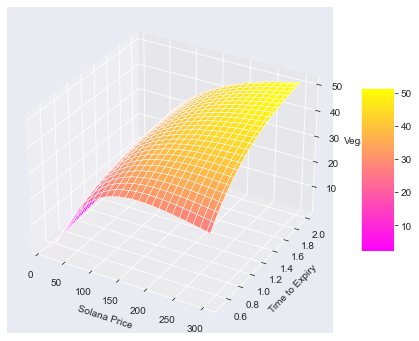

In [1052]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.spring, linewidth=0.5, antialiased=True)
ax.set_xlabel('Solana Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [1053]:
v = vega(80.74, 105, 1/52, 0.0114, 0, 1.43, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases by 1%, then the value of the option will increase by $', v.round(4)*0.01, '.')

The value of Vega is 2.1103 . If the volatility increases by 1%, then the value of the option will increase by $ 0.021103 .


### End of Code